# Approximations and Taylor expansion


## Introduction

In general, the resolution of numerical problems require some approximations.

**The first one** is related to the fact that most real numbers need an infinite numbers of digits after the decimal point to be properly represented. To store these numbers in the memory of a computer one, therefore, needs to cut their representation at some point beyond the decimal point. To quantify the numerical representation of data, one uses *precision*. Precision is usually measured *in bits or number of decimal digits*. For example, a number in *single precision* usually occupies 32 bits of computer memory. At the same time it is associated with 7 or fewer decimal digits. The number of digits kept is called the precision of the representation. To make a concrete example, in *single precision* and *double precision*, $\pi$ is approximated as follows:

```{math}
\pi &= 3.1415927 \quad\quad &\text{(single precision)}\\
\pi &= 3.141592653589793 \quad\quad &\text{(double precision)}\\
```

In this course we always use double precision for real numbers, as this is the default precision used by Python. It provides a good approximation for the kind of numerical problems we consider, but the reader should still be aware that rounding off errors can cause some difficulties, as they can get amplified when certain operations are performed or when some iterative procedures are used. Two good references to get started on the subject are:

- https://docs.python.org/3/tutorial/floatingpoint.html
- https://floating-point-gui.de

In the context of the numerical solution of ordinary or partial diffential equations, **the second more significant approximation** comes from that the computer resources are limited. From the physical point of view, both time and space are continuous variables, but continuous data does not exist in the numerical world, as it would require infinite computer memory. Therefore, continuous variables are approximated using a discrete representation. For that purpose, we can for example introduce *grid points* at which the functions are evaluated. A small grid spacing results in a higher accuracy, but it comes at a higher computational cost. Some balance always has to be found.

## Taylor's theorem

Taylor's theorem provides a valuable tool to estimate the accuracy of discretized differential operators or time integration schemes {footcite}`arfken2012`.

***Theorem.** Let $x$ be any point in the interval $[a, b]$ and $\Delta x$ a small positive real number. Schematically we have*:

<img src="../figures/taylor.png">

*Let $f(x)$ be some $k+1$ times differentiable function defined in $[a, b]$, then for each $\Delta x>0$ there exists a $\xi$, so that*

```{math}
:label: eq:taylorExpansion
f(x+\Delta x)=f(x)+f'(x)\Delta x+\frac{f''(x)}{2!}\Delta x^2+\dots + \frac{f^{(k)}(x)}{k!}\Delta x^k + R_{k+1}
```

*where $R_{k+1}$ is a **remainder term**:*

```{math}
R_{k+1} = \frac{f^{(k+1)}(\xi)}{(k+1)!}\Delta x^{k+1}, \quad\quad x\leq \xi \leq x+\Delta x.
```

In the above formula, $f^{(k)}$ denotes the $k$-th derivative of $f$. Note, that at this stage, no approximations have been made.

Assuming that $\vert f^{(k+1)}\vert$ is bounded by a constant $C$ in $[a\ b]$, read $\vert f^{(k+1)} \vert \leq C$, we can then write:

```{math}
:label: eq:remainder
\vert R_{k+1}\vert \leq \frac{C}{(k+1)!}\Delta x^{k+1}
```

Equation {eq}`eq:remainder` gives a bound on the error made by dropping terms beyond $\displaystyle\frac{f^{(k)}(x)}{k!}\Delta x^k$ in {eq}`eq:taylorExpansion`. One then gets as estimate for the remainder $R_{k+1}$:

```{math}
R_{k+1} = O(\Delta x^{k+1})
```

The above notation means that $\vert R_{k+1}\vert$ goes to $0$ at least as fast as $\Delta x^{k+1}$ for $\Delta x \rightarrow 0$:

```{math}
\lim_{\Delta x^{k+1}\rightarrow 0} R_{k+1} = 0.
```

We then say that the approximation,

```{math}
f(x+\Delta x)\approx f(x)+f'(x)\Delta x+\frac{f''(x)}{2!}\Delta x^2+\dots + \frac{f^{(k)}(x)}{k!}\Delta x^k
```

is of order $k+1$. Importantly, this implies that the remainder is at least reduced by a factor of $2^{k+1}$ if $\Delta x$ is divided by $2$. This is a very important concept that will be discussed numerous times in this course.

### Expansion of exponential function

To make things more concrete and to write our first Python code of the course, let us consider the Taylor expansion of the exponential function $e^x$ around $x=0$. According to {eq}`eq:taylorExpansion`, one has:

```{math}
:label: eq:residual
e^{\Delta x} = 1 + \Delta x + \frac{\Delta x^2}{2} + R_3,\quad\quad R_3=e^{\xi} \frac{\Delta x^3}{3!}, \quad\quad 0\leq \xi \leq \Delta x.
```

As $e^x$ is monotonously increasing, we certainly can bound $e^{\xi}$ by $e$ when $\Delta x \rightarrow 0$. Therefore, $\vert R_3 \vert \leq e \frac{\Delta x^3}{3!} = \mathcal{O}(\Delta x^3)$.

Let's write a Python code to check if this is indeed the case.

First of all, we need to *import* some Python packages into our code. One Python file can access the content of another by *importing* it. Packages we are going to be interested in the most throughout the course are:

* ``NumPy``

    > [NumPy][10] is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

* ``SciPy``

    > [SciPy][11] is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy, an interactive Python session becomes a data-processing and system-prototyping environment rivaling systems, such as MATLAB, IDL, Octave, R-Lab, and SciLab.

* ``Matplotlib``
    > [Matplotlib][12] is a comprehensive library for creating static, animated, and interactive visualizations in Python.

*NumPy*, *SciPy* and *Matplotlib* are fundamental packages for scientific computations in Python.

*NumPy* and *SciPy* are better to be understood together, because *SciPy actually builds on NumPy*.

> [Both NumPy and SciPy][13] are Python libraries used for used mathematical and numerical analysis. NumPy contains array data and basic operations such as sorting, indexing, etc, whereas SciPy consists of all the numerical code. Though NumPy provides a number of functions that can help resolve linear algebra, Fourier transforms, etc, SciPy is the library that actually contains fully-featured versions of these functions along with many others.

*Matplotlib* provides tools to visualize any kind of numerical data.

Imports in Python are performed using `import` statement:

[10]: <https://numpy.org/doc/stable/user/whatisnumpy.html> "Why NumPy?"
[11]: <https://docs.scipy.org/doc/scipy/reference/tutorial/general.html> "SciPy"
[12]: <https://matplotlib.org> "Matplotlib"
[13]: <https://medium.com/edureka/scipy-tutorial-38723361ba4b> "NumPy vs SciPy"

In [1]:
import numpy

In order to access the tools of a module (unit of Python code), we put the name of this module in front of the name of a given object:

In [2]:
print(numpy.pi)

3.141592653589793


Another option is to create a **shortcut** for the module name using the `as` keyword:

In [3]:
import numpy as np

print(np.pi)

3.141592653589793


In some cases it will even make more sense to import **only** the object you require from module:

In [4]:
from numpy import cos

Imports are usually performed at the beginning of the Python file before any other code.

In order to create comments in Python (text in your code which will be ignored by Python), put `#` in front of the text.

In [5]:
# Note that numpy has already been imported above.
# Here it is imported repeatedly for the sake of
# demonstrating what your code should look like.
#
# matplotlib.pyplot provides all the tools which
# are usually necessary for 2D plotting.

import numpy as np
import matplotlib.pyplot as plt

As we are working in *Jupyter*, we will take advantage of so-called **magic commands**. They are crazily helpful in some cases, but note that they are *specific to IPython and Jupyter* (IPython and Jupyter are projects offering interactive shell for Python programming).

What magic command does? It basically creates an *alias* to some command.

Magic commands have `%` in front of them.

A simple example of the usefulness of a magic command can be made with `%pinfo`. It outputs the documentation of an object, which is useful both for beginners and for the advanced programmers, and spares you the need to 'google' it. We've already used the `print` function above to output the value of $\pi$ - run the following cell to see documentation of `print`:

In [6]:
%pinfo print

To use matplotlib in notebooks, a very useful magic command is:

In [7]:
%matplotlib inline

From now on, whatever we plot will appear inline - in our notebook, right below the code which produced graphical output.

We then set the style of our plots, which will be universal throughout the whole course. Matplotlib has several predefined styles encoded in files. You, of course, can always create your own style.

In [8]:
plt.style.use('../styles/mainstyle.use')

Let us now create the first mathematical object that will represent the error term $R_3$ of the approximation of the exponential function (see {eq}`eq:residual`).

When we want to define a given quantity at a set of points, we might use *either* built-in *Python* sequences (list, tuple, range etc.) *or* 1D *NumPy* arrays. What to choose? In many cases your choice will not affect the result, **but** usually a *NumPy* array is better because of the following [reasons][3]:
* *Memory*

    They occupy less space.


* *Performance*

    They are faster.


* *Functionality*

    They support **way more** mathematical operations.


[3]: <https://webcourses.ucf.edu/courses/1249560/pages/python-lists-vs-numpy-arrays-what-is-the-difference> "Lists vs NumPy arrays"

Keep in mind, though, that you will encounter situations when it will be more convenient for you to create a list first and then transform it into *NumPy* array.

Let us consider <a name="exc1"> a few ways </a> of building a numerical sequence. Assume $\Delta x=f(k)$, where $k$ is an integer number defined in $k=1, 2,...,9$. To demonstrate the advantages of one approach over the others, we will use the *cell* magic command `%%timeit`. Double `%` here means that the command is applied to the *whole* cell. A word of caution is necessary. `%timeit` or `%%timeit` execute the measured code in a *private* scope. This means that they don't affect the values of the variables outside of the cell (or line for %timeit) in which the execution takes places. This also means than any variable defined within the cell (or line for %timeit) cease to exist after the timing operation.

Note, that the concept of *cell* in Python does not exist - it is unique to Jupyter Notebook, just as magic commands are unique to IPython. A notebook in Jupyter Notebook is a sequence of cells, which can be filled with Python code, documentation text written in [Markdown][14], or *raw* text, that is not evaluated by Jupyter Notebook.

[14]: <https://www.markdownguide.org/getting-started/> "Markdown"

1. *Create a Python list in a loop and then transform it into a NumPy array*

In [9]:
%%timeit

# First create an empty Python list, which
# will contain values of delta for all k.
delta_list = []

# We loop for k = 1, 2, ..., 9. We use the built-in
# range(min, max, step) function. It returns the
# sequence of integer numbers, such as:
# min, min+step, min+2*step,..., max-step.
# As you can see, max value is not included in
# the sequence. Min and step arguments are OPTIONAL
# for the range function => if you don't pass them
# to the function, they will be at their default values:
# min = 0, step = 1.
# For more info:
# https://docs.python.org/3/library/functions.html#func-range
#
# Example:
# range(5) will produce the following sequence:
# 0, 1, 2, 3, 4.
#
# We use the append method of Python class to add
# values to the list at each iteration. As
# a function method it is a piece of code which
# executes specific task, BUT unlike a simple
# function it is bound to a specific object.
# In this particular case, the append method is bound to
# the list.
# For more info:
# https://docs.python.org/3/tutorial/datastructures.html#more-on-lists
for k in range(1, 10):
    delta_list.append(2**(-k))

# We now convert the list into a NumPy array.
# For that particular purpose there is a NumPy
# function - numpy.array(a). Here a is some
# sequence.
# For more info:
# https://numpy.org/doc/stable/reference/generated/numpy.array.html
delta = np.array(delta_list)

1.93 µs ± 37.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


2. *Create a Python list using a list comprehension and then convert it to a NumPy array*

    This method is conceptually equivalent to the one described above, except for that we use a *list comprehension* for the list creation - it is a shortened way to generate lists in Python. Such an approach is the preferred one when possible.

In [10]:
%%timeit

# As you can see we managed to shorten our code -
# what has been previously accomplished in 3 lines,
# is now done in 1 line.
# For more info:
# https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions
delta_list = [2**(-k) for k in range(1, 10)]

delta = np.array(delta_list)

1.75 µs ± 39.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


3. *Create an empty NumPy array and then fill it with values in a loop*

In [11]:
%%timeit

delta = np.zeros(9)

for i in range(len(delta)):
    delta[i] = 2**(-i-1)

1.73 µs ± 34.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


For such a small piece of data we cannot see any advantages in speed for one method over the other. Sometimes you will certainly encounter situations when the efficiency advantage of one approach over the other will not be evident. A good recommendation would be **to keep the balance between efficiency and good programming style in your code**. You might think that style only affects the looks and, therefore, is not that important for production code, but this would be wrong. Whatever your results, you will barely find a person who is going to get interested in your code if it is not readable. Moreover, in 99% of the cases, programming is a collaborative work, so there are *coding conventions* in each programmimg language which regulate the style of coding. Python's coding conventions are provided by [PEP 8][15].

We are now <a name="exc2"> all set to build $R_3$</a>.

[15]: <https://www.python.org/dev/peps/pep-0008/> "PEP 8"

In [12]:
# Here you can clearly see the advantage of
# NumPy over built-in tools of Python.
#
# NumPy functions, such as exp, sin, cos, log etc.,
# can be applied on the WHOLE array and
# the corresponding mathematical operation will
# be applied on each element of array. This is
# not possible with the corresponding functions from
# Python's standard math module - there you
# would have to loop.
#
# NumPy arrays provide the possibility to avoid
# looping when applying the same operation
# on each element.

# Because %timeit executes all the code in a
# `private` scope, we need to redefine delta here
delta = np.zeros(9)

for i in range(len(delta)):
    delta[i] = 2**(-i-1)

R3 = np.exp(delta) - (1 + delta + delta**2 / 2)

slope = delta**3

As we have built the set of numerical data, we are ready to visualize it.

The fundamental object of *Matplotlib* is [`matplotlib.pyplot.figure`][4]. Whenever you created a plot, all the data is stored inside the instance of this object. *If you don't create the figure explicitly, it will be created implicitly*, but an explicit call to the object allows you to manipulate your plots in a more flexible way.

Figure is just your *blank sheet of paper* (metaphorically) - it is empty from the start. To have a plot, we would need to draw axes.

The most efficient way to add *Matplotlib* axes to a figure is through the methods of figure dedicated to this purpose. These are `add_axes` and `add_subplot` methods - they both return instances of a `matplotlib.axes.Axes` object - *Matplotlib* object which contains all the tools corresponding to the visualization of axes. The difference is that `add_axes` accepts as its arguments the *location* at which you place your axes - location is passed in units of figure sizing; `add_subplot` allows you to divide your figure in parts and you configure the locations of these parts by setting the amount of *rows and columns* in your figures.

We have create 2 figures - *figure 0* and *figure 1*, - and use them to demonstrate each of these two approaches.

[4]: <https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.figure.html> "Matplotlib figure"

Text(0.5, 1.05, 'Subplots')

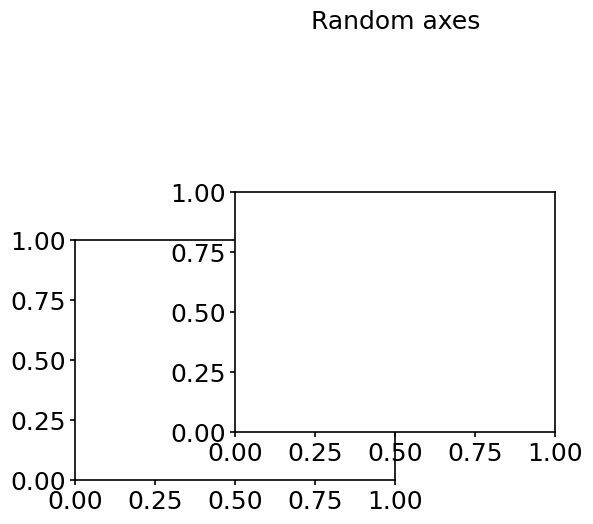

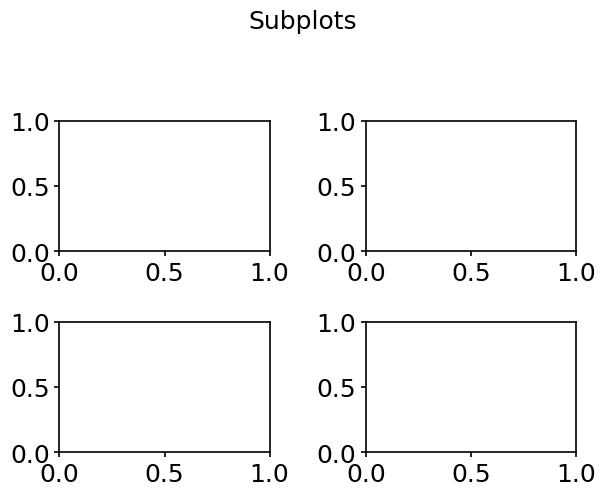

In [13]:
# We create first figures of the course.
# When creating figure 0, we set tight_layout
# keyword to False. We do it, because in a
# style we use it is set to True. tight_layout,
# when set to True, tries to optimize organi-
# zation of your plot - how the subplots, labels,
# legends are placed in a figure. In most cases
# it is a useful feature, but sometimes you
# will face a problem, that it won't know
# how to optimize your figure just because of
# how you have organized it manually. We disable
# it for the first figure, so that it doesn't
# complain about that we INTENTIONALLY overlap
# one subplot with another.
fig_0 = plt.figure(tight_layout=False)
fig_1 = plt.figure()

# Position axes in figure 0 using add_axes.
# We pass coordinates for our axes in a list
# of 4 floats as [left, bottom, width, height].
# See that axes, which are given name ax_1,
# is positioned at 0.25 of a figure from the left,
# 0.1 - from the bottom, and its width=height=0.65.
ax_0 = fig_0.add_axes([0., 0., 0.5, 0.5])
ax_1 = fig_0.add_axes([0.25, 0.1, 0.5, 0.5])

# Add title to figure 0.
fig_0.suptitle('Random axes',fontsize=18)

# Add 4 subplots to the figure 1. See that the
# first two numbers are the same for all sub-
# plots, which means that we specify that
# there are 2 subplots per row and 2 subplots
# per column. The third numbers identify the order
# in which subplots appear.
ax_2 = fig_1.add_subplot(221)
ax_3 = fig_1.add_subplot(222)
ax_4 = fig_1.add_subplot(223)
ax_5 = fig_1.add_subplot(224)

fig_1.suptitle('Subplots', fontsize=18, y=1.05)

It is mostly a matter of your taste which approach you use, but certainly, in cases where you want to create multiple subplots in one figure, the approach of using `add_subplots` is more convenient and, therefore, more reasonable.

Let's now talk even more reasonable. It has already been mentioned how important it is to shorten your code when possible. There is a way to create a figure with multiple subplots in it *in one call* by means of [`matplotlib.pyplot.subplots`][5]. **It is recommended that you stick to it**. While there is nothing one can have against the previously described ways, programmers should take as a habit to make their code *reasonably short*.

The logic behind subplotting with `subplots` is very similar to the one of `add_subplots`:

[5]: <https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html> "Subplots"

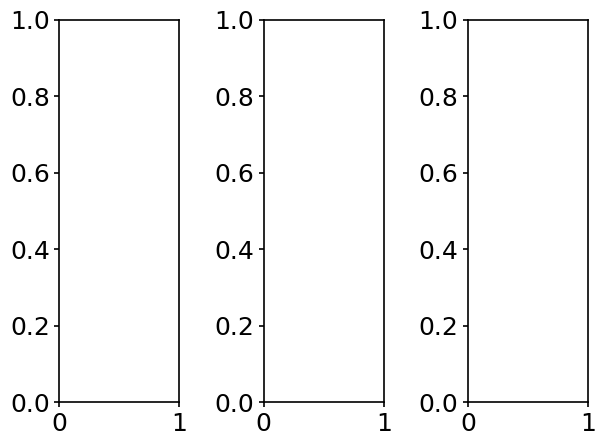

In [14]:
# Assume I want 3 subplots per row
# and 1 - per column.
fig, (ax_1, ax_2, ax_3) = plt.subplots(1, 3)

But we only need to create one plot at the moment, so we don't provide any arguments to `subplots` - single subplot in a figure is its default.

We then want to plot $R_3$ as a function of $\Delta x$ and use *log scaling* for both $x$ and $y$ axes - there is a function just for that - [`matplotlib.pyplot.loglog`][6]. For the plot with linear scaling refer to [`matplotlib.pyplot.plot`][7], which has the same syntax.

[6]: <https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.loglog.html> "loglog"
[7]: <https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot> "plot"

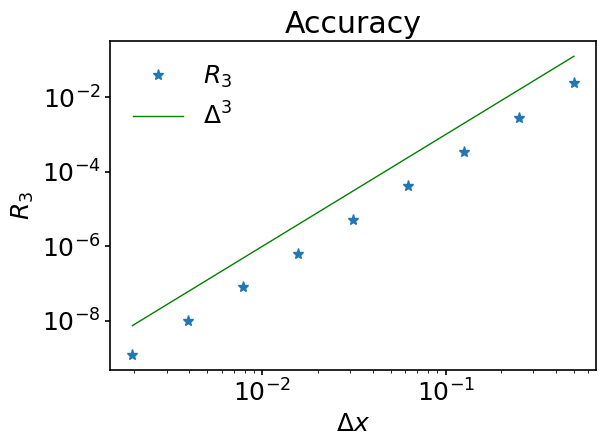

In [15]:
fig, ax = plt.subplots()

# Create a plot with log scaling.
# Pass x-data as first argument, y-data
# as second argument, other arguments are
# optional. '*' means that we want a dot
# plot with stars as markers. label argument
# defines the description for the data, which will
# be displayed in the legend.
ax.loglog(delta, R3, '*', label='$R_3$')

# We plot delta^3 with the same log scaling
# to show that R3 is of order delta^3. See
# that you can configure the color of dots and
# lines you plot with the color argument.
#
# This is one way to set a color of a curve -
# by simply passing the name of a color to
# the function. But this way is limited to only
# 8 colors. If you need bigger variety,
# Matplotlib supports RGBA format. You can either
# pass a tuple of float values in range [0, 1]
# as (red, green, blue, alpha), or you can
# pass an RGBA string.
# More info
# https://matplotlib.org/3.1.1/tutorials/colors/colors.html
#
ax.loglog(delta, slope, color='green', label=r'$\Delta^{3}$')

# We set labels of x axis and y axis.
ax.set_xlabel(r'$\Delta x$')
ax.set_ylabel('$R_3$')

# We set the title, which in this case is only
# related to the subplot referred by ax, but
# as we have only 1 subplot, it is then re-
# lated to the whole figure and can be used
# instead of 'fig.suptitle'.
ax.set_title('Accuracy')

# Enable automatic detection of elements
# to be shown in legend.
ax.legend()

# Save figure. Default format is png.
# dpi defines the resolution in dots per inch.
fig.savefig('../figures/taylorSlope', dpi=300)

You've seen above textual sequences created as follows:

    text_data = 'Hello, world!'

They are called [strings][8]. There are special characters in Python called *escape characters* which are meant for formatting. For example, `\n` would mean that the line is broken. The following code

    print('Hello\nworld')

will produce the output:

    Hello
    world

But there are also so-called *raw strings* in Python. All escape characters are ignored in a raw string. We would have this

    print(r'Hello\nworld')

to produce the following output:

    Hello\nworld

A nice feature of matplotlib is that it can display rendered LaTeX equations in place of regular strings. This is possible by enclosing the desired LaTeX code between ```$ $``` as we did above.


[8]: <https://docs.python.org/3/library/stdtypes.html#text-sequence-type-str> "Python strings"


## Summary

In this notebook we have introduced the concepts of numerical precision and numerical error. We also discussed different approaches to build numerical sequences in Python and learned about NumPy arrays - fundamental objects for scientific programming in Python. Using the Matplotlib package, we gave a trivial overview on 2D visualization and illustrated that the error term in Taylor series is of order $\mathcal{O}(\Delta x^{n+1})$ when the last expansion term considered is of order $\mathcal{O}(\Delta x^{n})$.

In the next notebook we will introduce Euler time-advancement schemes - numerical procedures for solving ordinary differential equations -, define numerical stability of the time-advancement scheme and the concepts of explicit and implicit time integration methods.


## References
```{footbibliography}
```